## 1. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data files.

df = pd.read_csv('/Users/gahooshao/S&P_resources/data_resources/sp500_stocks.csv')

In [3]:
# Count the number of companies.

len(df['Symbol'].unique())

503

In [4]:
# Select the stocks that we want to analyse, here using Apple, Amazon, Google and Microsoft as examples.

company_list = ['AAPL', 'AMZN', 'GOOG', 'MSFT']

selected_df = df[df['Symbol'].isin(company_list)].copy()
selected_df['Index'] = range(1, len(selected_df) + 1)
selected_df.set_index('Index', inplace=True)

selected_df.head()                                 

Date Symbol  Adj Close      Close       High        Low  \
Index                                                                  
1      2010-01-04   GOOG  15.571998  15.610239  15.678981  15.547723   
2      2010-01-05   GOOG  15.503423  15.541497  15.637387  15.480475   
3      2010-01-06   GOOG  15.112601  15.149715  15.588072  15.102393   
4      2010-01-07   GOOG  14.760787  14.797037  15.193053  14.760922   
5      2010-01-08   GOOG  14.957565  14.994298  15.024933  14.672753   

            Open       Volume  
Index                          
1      15.615220   78541293.0  
2      15.620949  120638494.0  
3      15.588072  159744526.0  
4      15.178109  257533695.0  
5      14.744733  189680313.0

In [5]:
# Show count of rows and columns.

selected_df.shape

(14808, 8)

In [6]:
# Confirm the stock name that we selected.

selected_df['Symbol'].unique()

array(['GOOG', 'AMZN', 'AAPL', 'MSFT'], dtype=object)

## 2. Analysing changes in stock prices over time

In [7]:
# Checking for missing values.

selected_df.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
# Checking for data types.

selected_df.dtypes

Date          object
Symbol        object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object

In [9]:
# Converting the data type of date.

pd.to_datetime(selected_df['Date'])

Index
1       2010-01-04
2       2010-01-05
3       2010-01-06
4       2010-01-07
5       2010-01-08
           ...    
14804   2024-09-12
14805   2024-09-13
14806   2024-09-16
14807   2024-09-17
14808   2024-09-18
Name: Date, Length: 14808, dtype: datetime64[ns]

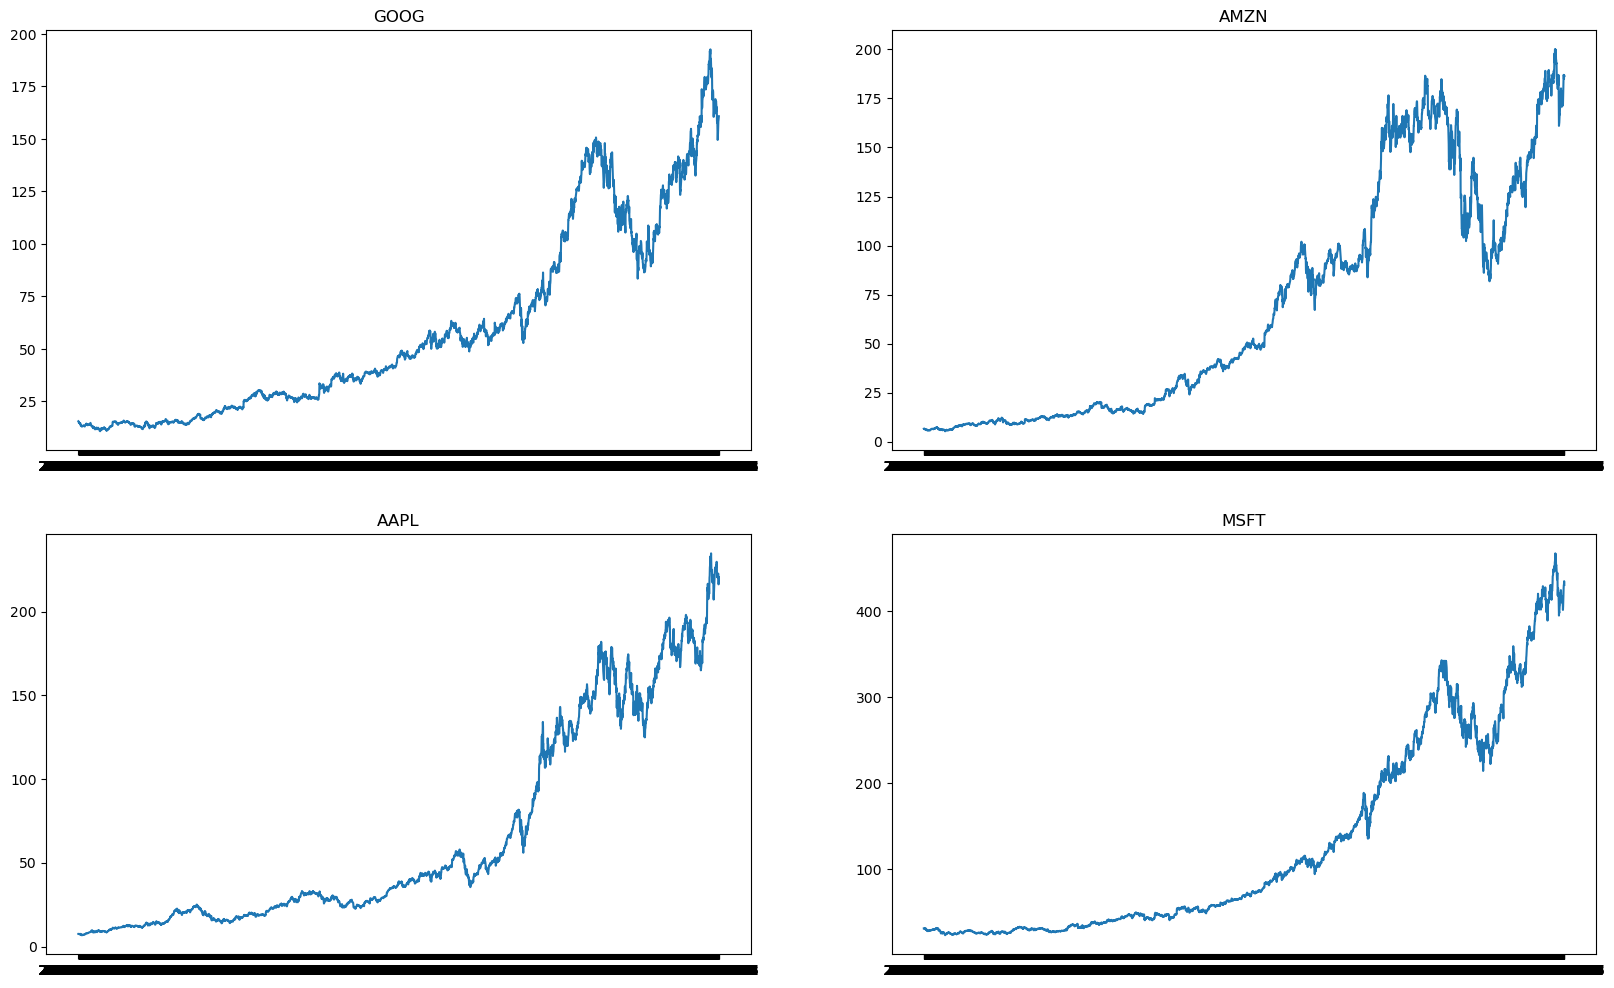

In [10]:
tech_list = selected_df['Symbol'].unique()

# Creating subplot for each stock.

plt.figure(figsize = (20, 12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = selected_df['Symbol']==company
    df = selected_df[filter1]
    plt.plot(df['Date'], df['Close'])
    plt.title(company)

## 3. Calculating the moving average of the stocks

In [11]:
# Set up a window of 10 days and show the first few rows.

selected_df['Close'].rolling(window = 10).mean().head(15)

Index
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10    14.953077
11    14.855618
12    14.747074
13    14.684110
14    14.574297
15    14.419826
Name: Close, dtype: float64

In [12]:
# Consider the different windows of rolling, ie. 10, 20, 50.

ma_day = [10, 20, 50]

new_df = selected_df.copy()

for ma in ma_day:
    new_df[f'Close_{ma}'] = new_df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(ma).mean())

# Show the new_data.

new_df.head(15)

Date Symbol  Adj Close      Close       High        Low  \
Index                                                                  
1      2010-01-04   GOOG  15.571998  15.610239  15.678981  15.547723   
2      2010-01-05   GOOG  15.503423  15.541497  15.637387  15.480475   
3      2010-01-06   GOOG  15.112601  15.149715  15.588072  15.102393   
4      2010-01-07   GOOG  14.760787  14.797037  15.193053  14.760922   
5      2010-01-08   GOOG  14.957565  14.994298  15.024933  14.672753   
6      2010-01-11   GOOG  14.934956  14.971633  15.055070  14.795543   
7      2010-01-12   GOOG  14.670846  14.706875  14.898158  14.645107   
8      2010-01-13   GOOG  14.586619  14.622441  14.654571  14.293923   
9      2010-01-14   GOOG  14.655193  14.691184  14.799528  14.515841   
10     2010-01-15   GOOG  14.410463  14.445853  14.783587  14.397036   
11     2010-01-19   GOOG  14.599788  14.635642  14.705381  14.353450   
12     2010-01-20   GOOG  14.420650  14.456065  14.594795  14.328543   
13     2010-01-21   GOOG  14.484504  14.520075  14.615717  14.252827   
14     2010-01-22   GOOG  13.665344  13.698903  14.211731  13.321567   
15     2010-01-25   GOOG  13.416639  13.449588  13.695665  13.337757   

            Open       Volume   Close_10  Close_20  Close_50  
Index                                                         
1      15.615220   78541293.0        NaN       NaN       NaN  
2      15.620949  120638494.0        NaN       NaN       NaN  
3      15.588072  159744526.0        NaN       NaN       NaN  
4      15.178109  257533695.0        NaN       NaN       NaN  
5      14.744733  189680313.0        NaN       NaN       NaN  
6      15.055070  289597429.0        NaN       NaN       NaN  
7      14.885456  194859654.0        NaN       NaN       NaN  
8      14.358431  260838034.0        NaN       NaN       NaN  
9      14.542989  170239717.0        NaN       NaN       NaN  
10     14.778108  218194794.0  14.953077       NaN       NaN  
11     14.475741  173315202.0  14.855618       NaN       NaN  
12     14.594795  130515377.0  14.747074       NaN       NaN  
13     14.531532  253253712.0  14.684110       NaN       NaN  
14     14.059800  273035583.0  14.574297       NaN       NaN  
15     13.613722  177458675.0  14.419826       NaN       NaN

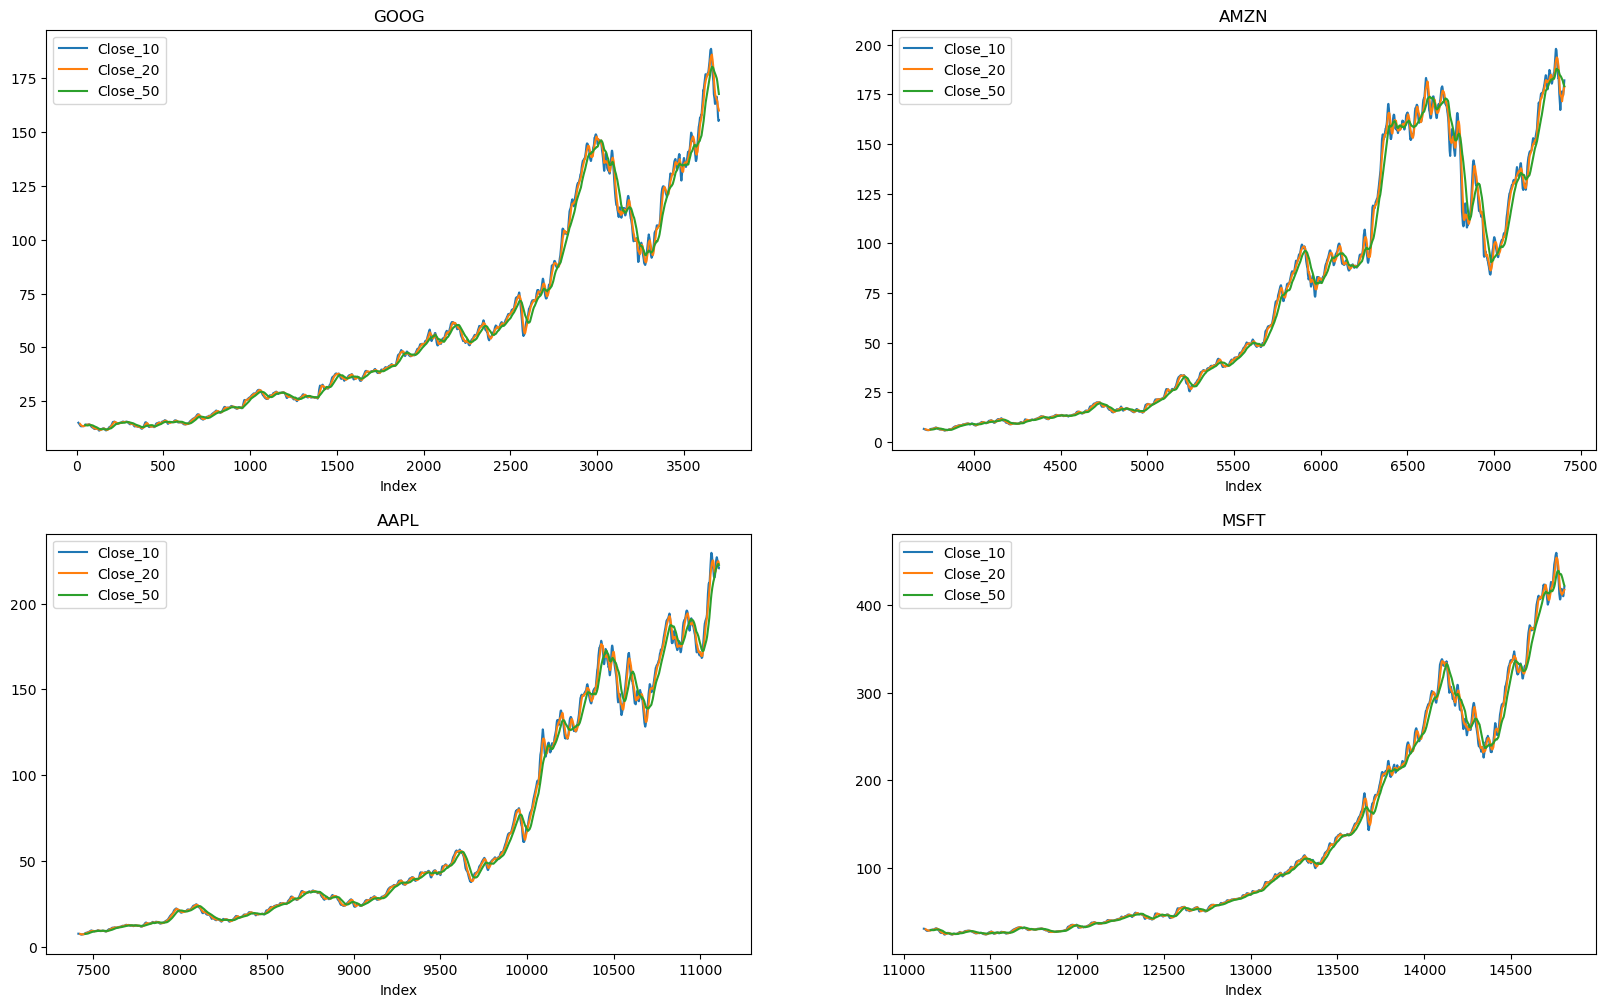

In [13]:
# Creating subplot of moving average for each stock.

plt.figure(figsize = (20, 12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_df['Symbol']==company
    df = new_df[filter1]
    df[['Close_10', 'Close_20', 'Close_50']].plot(ax=plt.gca())
    plt.title(company)

## 4. Analysing closing price change 

In [14]:
# Using Google as an example firstly.

google_df = selected_df[selected_df['Symbol'] == 'GOOG'].copy()

google_df.head()

Date Symbol  Adj Close      Close       High        Low  \
Index                                                                  
1      2010-01-04   GOOG  15.571998  15.610239  15.678981  15.547723   
2      2010-01-05   GOOG  15.503423  15.541497  15.637387  15.480475   
3      2010-01-06   GOOG  15.112601  15.149715  15.588072  15.102393   
4      2010-01-07   GOOG  14.760787  14.797037  15.193053  14.760922   
5      2010-01-08   GOOG  14.957565  14.994298  15.024933  14.672753   

            Open       Volume  
Index                          
1      15.615220   78541293.0  
2      15.620949  120638494.0  
3      15.588072  159744526.0  
4      15.178109  257533695.0  
5      14.744733  189680313.0

In [15]:
google_df['Daily_return(%)'] = google_df['Close'].pct_change() * 100

google_df.head(10)

Date Symbol  Adj Close      Close       High        Low  \
Index                                                                  
1      2010-01-04   GOOG  15.571998  15.610239  15.678981  15.547723   
2      2010-01-05   GOOG  15.503423  15.541497  15.637387  15.480475   
3      2010-01-06   GOOG  15.112601  15.149715  15.588072  15.102393   
4      2010-01-07   GOOG  14.760787  14.797037  15.193053  14.760922   
5      2010-01-08   GOOG  14.957565  14.994298  15.024933  14.672753   
6      2010-01-11   GOOG  14.934956  14.971633  15.055070  14.795543   
7      2010-01-12   GOOG  14.670846  14.706875  14.898158  14.645107   
8      2010-01-13   GOOG  14.586619  14.622441  14.654571  14.293923   
9      2010-01-14   GOOG  14.655193  14.691184  14.799528  14.515841   
10     2010-01-15   GOOG  14.410463  14.445853  14.783587  14.397036   

            Open       Volume  Daily_return(%)  
Index                                           
1      15.615220   78541293.0              NaN  
2      15.620949  120638494.0        -0.440364  
3      15.588072  159744526.0        -2.520876  
4      15.178109  257533695.0        -2.327953  
5      14.744733  189680313.0         1.333111  
6      15.055070  289597429.0        -0.151158  
7      14.885456  194859654.0        -1.768398  
8      14.358431  260838034.0        -0.574109  
9      14.542989  170239717.0         0.470118  
10     14.778108  218194794.0        -1.669919

In [16]:
import plotly.express as px

px.line(google_df, x = 'Date', y = 'Daily_return(%)', title = 'Percentage change of Google')

In [17]:
# Calculating the percentage change of Amazon.

amazon_df = selected_df[selected_df['Symbol'] == 'AMZN'].copy()
amazon_df['Daily_return(%)'] = amazon_df['Close'].pct_change() * 100
px.line(amazon_df, x = 'Date', y = 'Daily_return(%)', title = 'Percentage change of Amazon')

In [18]:
# Calculating the percentage change of Apple.

apple_df = selected_df[selected_df['Symbol'] == 'AAPL'].copy()
apple_df['Daily_return(%)'] = apple_df['Close'].pct_change() * 100
px.line(apple_df, x = 'Date', y = 'Daily_return(%)', title = 'Percentage change of Apple')

In [19]:
# Calculating the percentage change of Microsoft.

microsoft_df = selected_df[selected_df['Symbol'] == 'MSFT'].copy()
microsoft_df['Daily_return(%)'] = microsoft_df['Close'].pct_change() * 100
px.line(microsoft_df, x = 'Date', y = 'Daily_return(%)', title = 'Percentage change of Microsoft')

## 5. Resampling analysis of closing price 

In [20]:
# Using Google as an example firstly.

# Checking for data types.

google_df.dtypes

Date                object
Symbol              object
Adj Close          float64
Close              float64
High               float64
Low                float64
Open               float64
Volume             float64
Daily_return(%)    float64
dtype: object

In [21]:
# Converting the data type of date.

google_df['Date'] = pd.to_datetime(google_df['Date'])

google_df.dtypes

Date               datetime64[ns]
Symbol                     object
Adj Close                 float64
Close                     float64
High                      float64
Low                       float64
Open                      float64
Volume                    float64
Daily_return(%)           float64
dtype: object

In [22]:
google_df.set_index('Date', inplace = True)

google_df.head(10)

Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2010-01-04   GOOG  15.571998  15.610239  15.678981  15.547723  15.615220   
2010-01-05   GOOG  15.503423  15.541497  15.637387  15.480475  15.620949   
2010-01-06   GOOG  15.112601  15.149715  15.588072  15.102393  15.588072   
2010-01-07   GOOG  14.760787  14.797037  15.193053  14.760922  15.178109   
2010-01-08   GOOG  14.957565  14.994298  15.024933  14.672753  14.744733   
2010-01-11   GOOG  14.934956  14.971633  15.055070  14.795543  15.055070   
2010-01-12   GOOG  14.670846  14.706875  14.898158  14.645107  14.885456   
2010-01-13   GOOG  14.586619  14.622441  14.654571  14.293923  14.358431   
2010-01-14   GOOG  14.655193  14.691184  14.799528  14.515841  14.542989   
2010-01-15   GOOG  14.410463  14.445853  14.783587  14.397036  14.778108   

                 Volume  Daily_return(%)  
Date                                      
2010-01-04   78541293.0              NaN  
2010-01-05  120638494.0        -0.440364  
2010-01-06  159744526.0        -2.520876  
2010-01-07  257533695.0        -2.327953  
2010-01-08  189680313.0         1.333111  
2010-01-11  289597429.0        -0.151158  
2010-01-12  194859654.0        -1.768398  
2010-01-13  260838034.0        -0.574109  
2010-01-14  170239717.0         0.470118  
2010-01-15  218194794.0        -1.669919

In [23]:
google_df['Close'].resample('M').mean()

Date
2010-01-31     14.411010
2010-02-28     13.322393
2010-03-31     13.973374
2010-04-30     13.874554
2010-05-31     12.386896
                 ...    
2024-05-31    173.573636
2024-06-30    179.243684
2024-07-31    182.196819
2024-08-31    165.320908
2024-09-30    156.069998
Freq: M, Name: Close, Length: 177, dtype: float64

<Axes: title={'center': 'Google'}, xlabel='Date'>

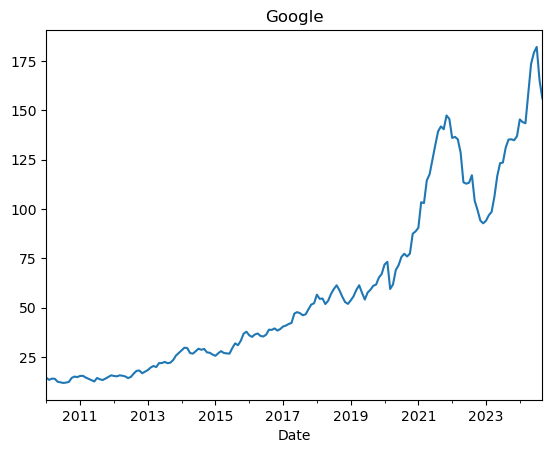

In [24]:
# Resample data on Monthly basis.

google_df['Close'].resample('M').mean().plot(title = 'Google')

<Axes: title={'center': 'Google'}, xlabel='Date'>

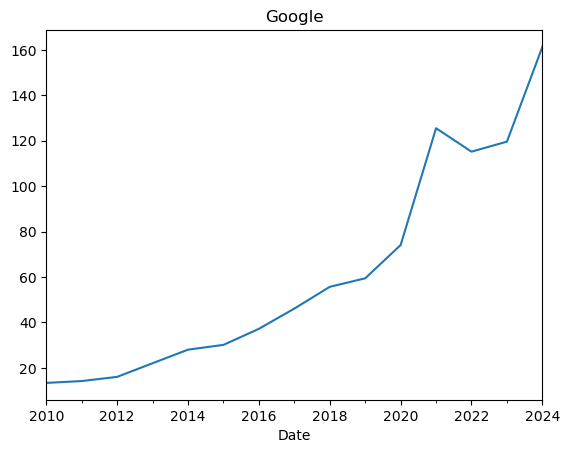

In [25]:
# Resample data on Yearly basis.

google_df['Close'].resample('Y').mean().plot(title = 'Google')

<Axes: title={'center': 'Google'}, xlabel='Date'>

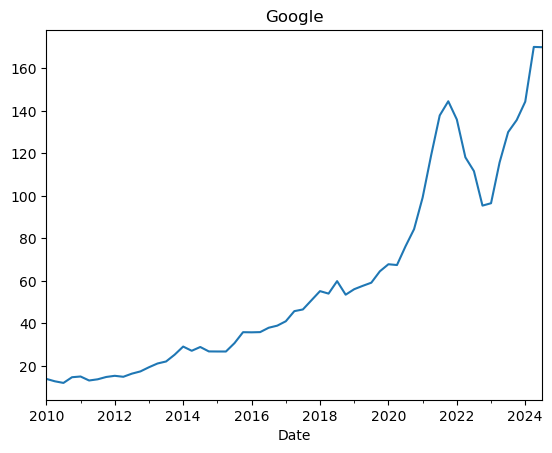

In [26]:
# Resample data on Quarterly basis.

google_df['Close'].resample('Q').mean().plot(title = 'Google')

<Axes: title={'center': 'Amazon'}, xlabel='Date'>

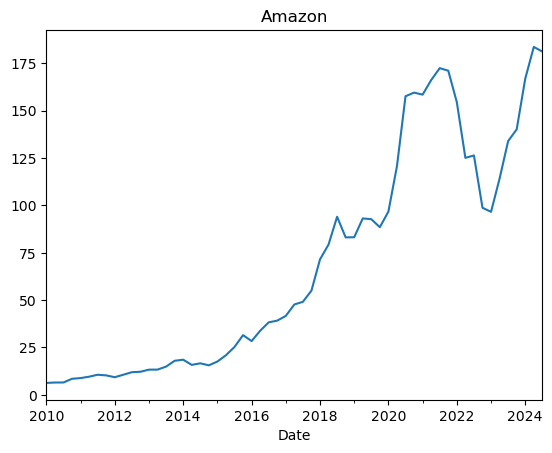

In [27]:
# Resample data of Amazon on Quarterly basis.

amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
amazon_df.set_index('Date', inplace = True)
amazon_df['Close'].resample('Q').mean().plot(title = 'Amazon')

<Axes: title={'center': 'Apple'}, xlabel='Date'>

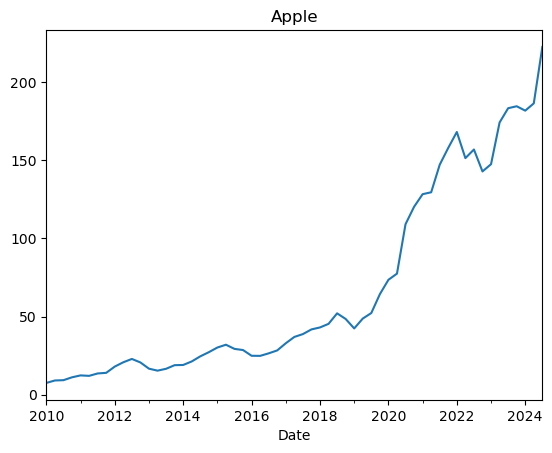

In [28]:
# Resample data of Apple on Quarterly basis.

apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace = True)
apple_df['Close'].resample('Q').mean().plot(title = 'Apple')

<Axes: title={'center': 'Microsoft'}, xlabel='Date'>

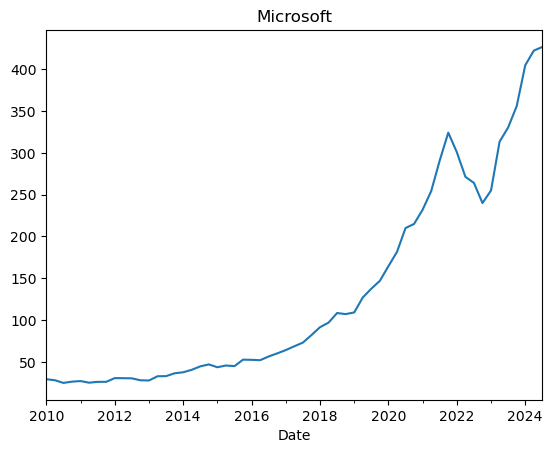

In [29]:
# Resample data of Microsoft on Quarterly basis.

microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])
microsoft_df.set_index('Date', inplace = True)
microsoft_df['Close'].resample('Q').mean().plot(title = 'Microsoft')

## 6. Correlation analysis of closing prices

In [30]:
# Create a table of closing prices.

closing_price = pd.DataFrame()

closing_price['Google_Close'] = google_df['Close']
closing_price['Amazon_Close'] = amazon_df['Close']
closing_price['Apple_Close'] = apple_df['Close']
closing_price['Microsoft_Close'] = microsoft_df['Close']

closing_price

Google_Close  Amazon_Close  Apple_Close  Microsoft_Close
Date                                                                
2010-01-04     15.610239      6.695000     7.643214        30.950001
2010-01-05     15.541497      6.734500     7.656429        30.959999
2010-01-06     15.149715      6.612500     7.534643        30.770000
2010-01-07     14.797037      6.500000     7.520714        30.450001
2010-01-08     14.994298      6.676000     7.570714        30.660000
...                  ...           ...          ...              ...
2024-09-12    155.539993    187.000000   222.770004       427.000000
2024-09-13    158.369995    186.490005   222.500000       430.589996
2024-09-16    158.990005    184.889999   216.320007       431.339996
2024-09-17    160.279999    186.880005   216.789993       435.149994
2024-09-18    160.809998    186.429993   220.690002       430.809998

[3702 rows x 4 columns]

/Users/gahooshao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



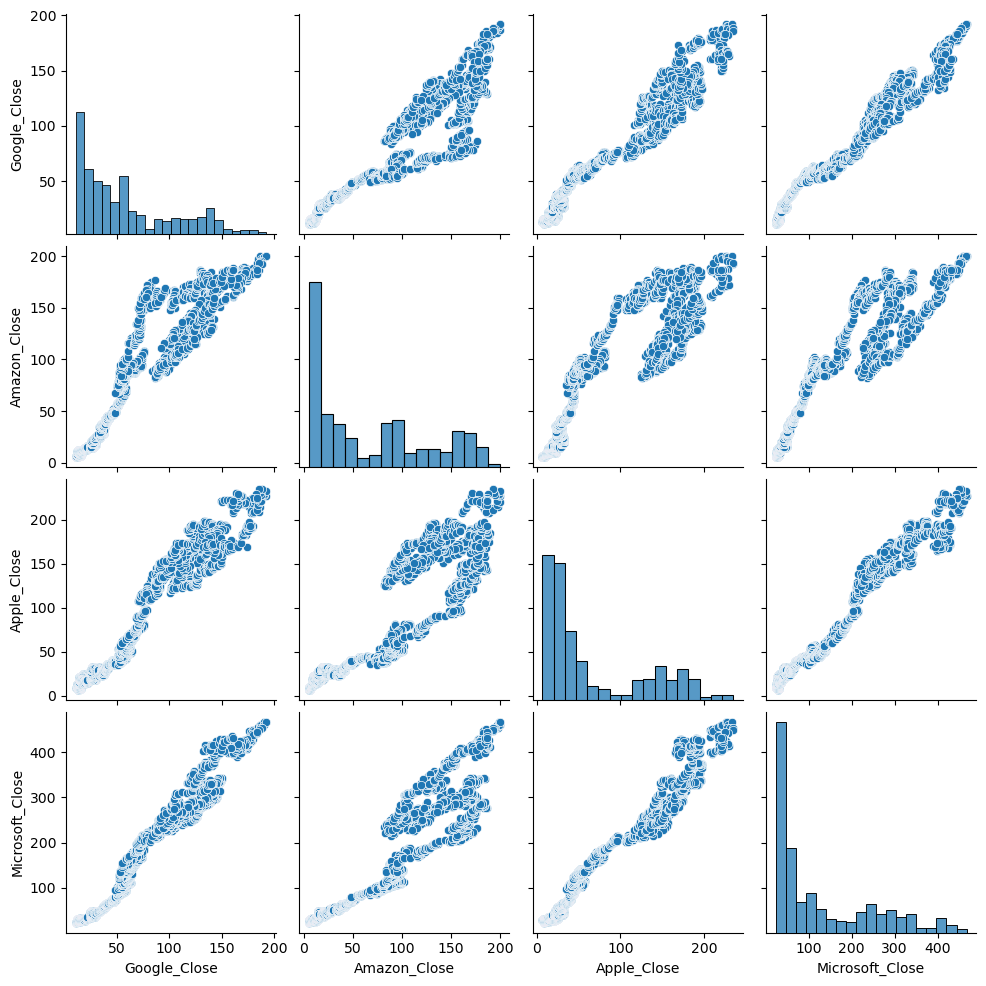

In [31]:
sns.pairplot(closing_price)

In [32]:
# Calculating the correlation values.

closing_price.corr()

Google_Close  Amazon_Close  Apple_Close  Microsoft_Close
Google_Close         1.000000      0.942794     0.971704         0.984308
Amazon_Close         0.942794      1.000000     0.909084         0.933185
Apple_Close          0.971704      0.909084     1.000000         0.985550
Microsoft_Close      0.984308      0.933185     0.985550         1.000000

<Axes: >

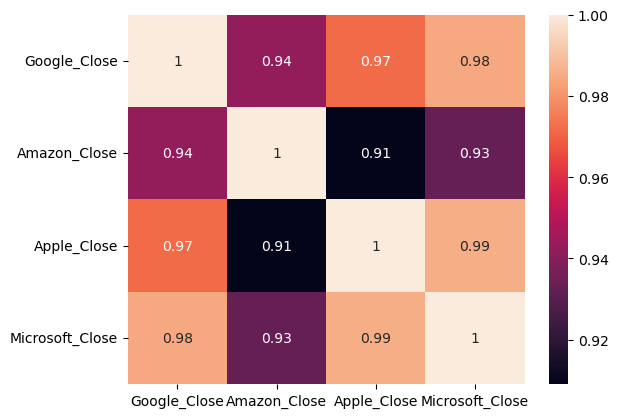

In [33]:
# Creating a heatmap.

sns.heatmap(closing_price.corr(), annot=True)

## 7. Correlation analysis between daily changes and daily returns

In [34]:
# Using a different way to calculate the percentage changes.

for col in closing_price.columns:
    closing_price[col + '_pct_changes'] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100
    
closing_price

Google_Close  Amazon_Close  Apple_Close  Microsoft_Close  \
Date                                                                   
2010-01-04     15.610239      6.695000     7.643214        30.950001   
2010-01-05     15.541497      6.734500     7.656429        30.959999   
2010-01-06     15.149715      6.612500     7.534643        30.770000   
2010-01-07     14.797037      6.500000     7.520714        30.450001   
2010-01-08     14.994298      6.676000     7.570714        30.660000   
...                  ...           ...          ...              ...   
2024-09-12    155.539993    187.000000   222.770004       427.000000   
2024-09-13    158.369995    186.490005   222.500000       430.589996   
2024-09-16    158.990005    184.889999   216.320007       431.339996   
2024-09-17    160.279999    186.880005   216.789993       435.149994   
2024-09-18    160.809998    186.429993   220.690002       430.809998   

            Google_Close_pct_changes  Amazon_Close_pct_changes  \
Date                                                             
2010-01-04                       NaN                       NaN   
2010-01-05                 -0.440364                  0.589989   
2010-01-06                 -2.520876                 -1.811563   
2010-01-07                 -2.327953                 -1.701326   
2010-01-08                  1.333111                  2.707694   
...                              ...                       ...   
2024-09-12                  2.228064                  1.344025   
2024-09-13                  1.819469                 -0.272724   
2024-09-16                  0.391495                 -0.857958   
2024-09-17                  0.811368                  1.076319   
2024-09-18                  0.330671                 -0.240803   

            Apple_Close_pct_changes  Microsoft_Close_pct_changes  
Date                                                              
2010-01-04                      NaN                          NaN  
2010-01-05                 0.172893                     0.032305  
2010-01-06                -1.590632                    -0.613691  
2010-01-07                -0.184871                    -1.039973  
2010-01-08                 0.664833                     0.689652  
...                             ...                          ...  
2024-09-12                 0.049403                     0.936080  
2024-09-13                -0.121203                     0.840749  
2024-09-16                -2.777525                     0.174180  
2024-09-17                 0.217264                     0.883293  
2024-09-18                 1.798980                    -0.997356  

[3702 rows x 8 columns]

In [35]:
closing_price_change = closing_price[['Google_Close_pct_changes', 'Amazon_Close_pct_changes', 
                                      'Apple_Close_pct_changes', 'Microsoft_Close_pct_changes']]

closing_price_change

Google_Close_pct_changes  Amazon_Close_pct_changes  \
Date                                                             
2010-01-04                       NaN                       NaN   
2010-01-05                 -0.440364                  0.589989   
2010-01-06                 -2.520876                 -1.811563   
2010-01-07                 -2.327953                 -1.701326   
2010-01-08                  1.333111                  2.707694   
...                              ...                       ...   
2024-09-12                  2.228064                  1.344025   
2024-09-13                  1.819469                 -0.272724   
2024-09-16                  0.391495                 -0.857958   
2024-09-17                  0.811368                  1.076319   
2024-09-18                  0.330671                 -0.240803   

            Apple_Close_pct_changes  Microsoft_Close_pct_changes  
Date                                                              
2010-01-04                      NaN                          NaN  
2010-01-05                 0.172893                     0.032305  
2010-01-06                -1.590632                    -0.613691  
2010-01-07                -0.184871                    -1.039973  
2010-01-08                 0.664833                     0.689652  
...                             ...                          ...  
2024-09-12                 0.049403                     0.936080  
2024-09-13                -0.121203                     0.840749  
2024-09-16                -2.777525                     0.174180  
2024-09-17                 0.217264                     0.883293  
2024-09-18                 1.798980                    -0.997356  

[3702 rows x 4 columns]

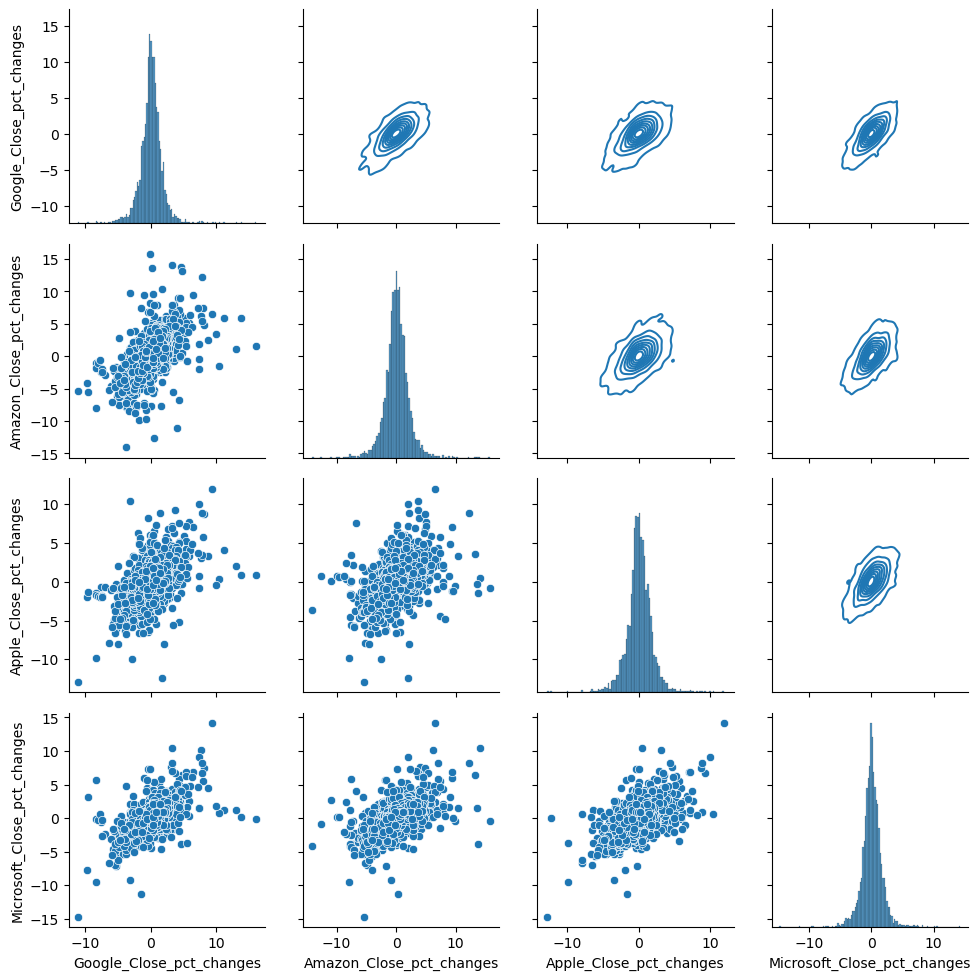

In [36]:
# Drop rows with NaN values.
closing_price_change_clean = closing_price_change.dropna()

# Now, try the PairGrid plot.
g = sns.PairGrid(data=closing_price_change_clean)
g.map_diag(sns.histplot)  # Plotting histograms on the diagonal.
g.map_lower(sns.scatterplot)  # Scatter plots on the lower triangle.
g.map_upper(sns.kdeplot)  # Kernel density plot on the upper triangle.

plt.show()

In [37]:
# Calculating the correlation values.

closing_price_change.corr()

Google_Close_pct_changes  \
Google_Close_pct_changes                     1.000000   
Amazon_Close_pct_changes                     0.597776   
Apple_Close_pct_changes                      0.550033   
Microsoft_Close_pct_changes                  0.638725   

                             Amazon_Close_pct_changes  \
Google_Close_pct_changes                     0.597776   
Amazon_Close_pct_changes                     1.000000   
Apple_Close_pct_changes                      0.479962   
Microsoft_Close_pct_changes                  0.568615   

                             Apple_Close_pct_changes  \
Google_Close_pct_changes                    0.550033   
Amazon_Close_pct_changes                    0.479962   
Apple_Close_pct_changes                     1.000000   
Microsoft_Close_pct_changes                 0.586791   

                             Microsoft_Close_pct_changes  
Google_Close_pct_changes                        0.638725  
Amazon_Close_pct_changes                        0.568615  
Apple_Close_pct_changes                         0.586791  
Microsoft_Close_pct_changes                     1.000000